In [5]:
import numpy as np 
import pandas as pd
from scipy import ndimage 
from scipy.cluster import hierarchy 
from scipy.spatial import distance_matrix 
from matplotlib import pyplot as plt 
from sklearn import manifold, datasets 
from sklearn.cluster import AgglomerativeClustering 
from sklearn.datasets.samples_generator import make_blobs 
%matplotlib inline

In [73]:
X1, Y1 = make_blobs(n_samples=30, centers=[[-1,2], [2, 1], [3, 4], [1,1]], cluster_std=0.8)

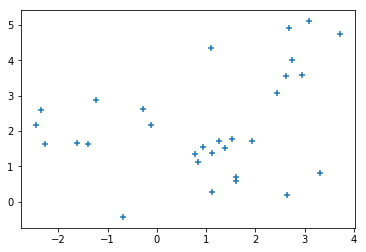

In [74]:
plt.scatter(X1[:, 0], X1[:, 1], marker='+') 

In [75]:
agglom = AgglomerativeClustering(n_clusters = 4, linkage = 'complete')

In [76]:
agglom.fit(X1,Y1)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
            connectivity=None, linkage='complete', memory=None,
            n_clusters=4, pooling_func='deprecated')

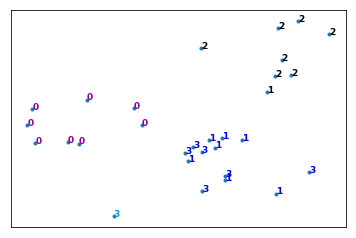

In [77]:
# Create a figure of size 6 inches by 4 inches.
plt.figure(figsize=(6,4))

# These two lines of code are used to scale the data points down,
# Or else the data points will be scattered very far apart.

# Create a minimum and maximum range of X1.
x_min, x_max = np.min(X1, axis=0), np.max(X1, axis=0)

# Get the average distance for X1.
X1 = (X1 - x_min) / (x_max - x_min)

# This loop displays all of the datapoints.
for i in range(X1.shape[0]):
    # Replace the data points with their respective cluster value 
    # (ex. 0) and is color coded with a colormap (plt.cm.spectral)
    plt.text(X1[i, 0], X1[i, 1], str(Y1[i]),
             color=plt.cm.nipy_spectral(agglom.labels_[i] / 10.),
             fontdict={'weight': 'bold', 'size': 9})
    
# Remove the x ticks, y ticks, x and y axis
plt.xticks([])
plt.yticks([])
#plt.axis('off')



# Display the plot of the original data before clustering
plt.scatter(X1[:, 0], X1[:, 1], marker='.')
# Display the plot
plt.show()

In [78]:
dist_matrix=distance_matrix(X1,X1)
print(dist_matrix)

[[0.         0.56180137 0.85929088 0.60771513 0.16044745 0.36290707
  0.90603368 0.70721237 1.10344894 0.64829469 0.9102078  0.71509416
  0.5640295  0.96569358 0.67218322 0.96848982 0.71551774 1.04329018
  0.23612106 0.19593895 0.37975882 0.08162309 0.54337483 0.54873924
  0.0967784  0.63166165 0.69782671 0.8120511  0.59507355 0.89787609]
 [0.56180137 0.         0.4535177  0.06308558 0.41703372 0.27957478
  0.53174785 0.18378694 0.73313529 0.10446489 0.48897544 0.20067829
  0.0776984  0.40556722 0.22905415 0.66956533 0.16472397 0.73196256
  0.42736544 0.38034658 0.20418485 0.56780101 0.04334329 0.44306734
  0.52348887 0.07051841 0.50544468 0.3712165  0.03857536 0.36534407]
 [0.85929088 0.4535177  0.         0.39453915 0.76673242 0.49748163
  0.08332695 0.53915373 0.27981628 0.36437603 0.05225636 0.558357
  0.52596296 0.5041508  0.6380289  0.2441224  0.34619524 0.29113235
  0.63585948 0.73836976 0.50850095 0.82353907 0.49683779 0.89658416
  0.86570345 0.41871864 0.28264417 0.08807978 0.

In [79]:
z=hierarchy.linkage(dist_matrix,'average')

C:\Users\Acer\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  """Entry point for launching an IPython kernel.


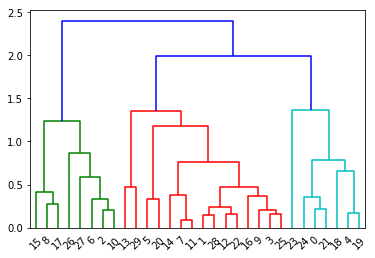

In [80]:
dendro=hierarchy.dendrogram(z)